In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
from datetime import datetime
import ta
import numpy as np
import pandas as pd
import ta
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans



C:\Users\juini\anaconda3\envs\py38\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
symbols = ['^BVSP', 'BBAS3.SA', 'BBDC4.SA', 'BMGB4.SA', 
                 'BPAC11.SA', 'BRML3.SA', 'ENBR3.SA', 'EVEN3.SA',
                 'ITSA4.SA', 'JHSF3.SA', 'LCAM3.SA', 'MGLU3.SA', 
                'MRFG3.SA', 'OIBR3.SA', 'PETR4.SA', 'PTBL3.SA', 'RENT3.SA', 
                'SLCE3.SA', 'TAEE4.SA', 'USIM5.SA', 'VALE3.SA', 
                'VVAR3.SA', 'WEGE3.SA']

df = web.DataReader(symbols[0], "yahoo")
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-09-21,47391.0,46425.0,47263.0,46590.0,2601200.0,46590.0
2015-09-22,46585.0,45276.0,46585.0,46265.0,4193100.0,46265.0
2015-09-23,46480.0,45340.0,46263.0,45340.0,3962000.0,45340.0
2015-09-24,45572.0,44183.0,45340.0,45292.0,4331700.0,45292.0
2015-09-25,45969.0,44697.0,45300.0,44831.0,3135300.0,44831.0


In [4]:
def alvo(x):
    if x>0:
        return 1
    return 0

In [5]:
df['v1'] = df['High']/df['Low'] # razão da máxima/mínima


df['v2'] = abs(df['Close'] - df['Open']) / abs(df['High'] -  df['Low']) #razão do corpo pelo atr


cond = [df['Close'] >= df['Open'], df['Close'] < df['Open']]
choice = [abs(df['High'] - df['Close']) / abs(df['Low'] -  df['Open']), abs(df['High'] - df['Open']) / abs(df['Low'] -  df['Close'])]

df['v3'] = np.select(cond,choice)


a = 1

df['v1-'] = df['v1'].shift(a)
df['v2-'] = df['v2'].shift(a)
df['v3-'] = df['v3'].shift(a)


df['v1o'] = df['v1'].rolling(3).mean()
df['v2o'] = df['v2'].rolling(3).mean()



df['rsi'] = ta.momentum.RSIIndicator(close=df['Close'], n = 14, fillna = False).rsi()
df['rsi-'] = np.select([df['rsi'] < 30 , df['rsi'] > 70], [1,-1], default=0)

df['ema20'] = ta.trend.EMAIndicator(close = df['Close'], n = 20, fillna = False).ema_indicator()
df['ema20-'] = [1 if df.loc[i,'Close'] > df.loc[i,'ema20'] else 0 for i in df.index ]


df['return'] = df['Close'].pct_change()

df['alvo'] = df['return'].map(alvo).shift(-1) 

df.dropna(inplace=True)

df


,High,Low,Open,Close,Volume,Adj Close,v1,v2,v3,v1-,...,v1o,v2o,rsi,rsi-,sma200,sma200-,ema20,ema20-,return,alvo
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-23,43601.0,42359.0,43235.0,42521.0,3805300.0,42521.0,1.029321,0.574879,2.259259,1.043352,...,1.030368,0.533663,59.614729,0,47723.295,0.890990,40843.476142,1,-0.016514,0.0
2016-02-24,42521.0,41211.0,42521.0,42085.0,3522700.0,42085.0,1.031788,0.332824,0.000000,1.029321,...,1.034820,0.615542,56.761318,0,47652.575,0.883163,40961.716509,1,-0.010254,0.0
2016-02-25,42327.0,41442.0,42084.0,41888.0,4046700.0,41888.0,1.021355,0.221469,0.544843,1.031788,...,1.027488,0.376391,55.469419,0,47575.245,0.880458,41049.933985,1,-0.004681,0.0
2016-02-26,42495.0,41417.0,41889.0,41593.0,3274600.0,41593.0,1.026028,0.274583,3.443182,1.021355,...,1.026390,0.276292,53.505536,0,47492.950,0.875772,41101.654558,1,-0.007043,1.0
2016-02-29,43053.0,41599.0,41599.0,42794.0,4473500.0,42794.0,1.034953,0.821871,inf,1.026028,...,1.027445,0.439307,59.752966,0,47421.405,0.902419,41262.830314,1,0.028875,1.0


In [8]:
variaveis = ['v1','v2','v1-','v2-','sma200-','ema20-','rsi-']

df[variaveis].head()

,v1,v2,v1-,v2-,sma200-,ema20-,rsi-
Date,,,,,,,
2016-02-18,1.012505,0.283495,1.036086,0.455345,0.865565,1,0
2016-02-19,1.018431,0.087186,1.012505,0.283495,0.868189,1,0
2016-02-22,1.043352,0.938923,1.018431,0.087186,0.904738,1,0
2016-02-23,1.029321,0.574879,1.043352,0.938923,0.890990,1,0
2016-02-24,1.031788,0.332824,1.029321,0.574879,0.883163,1,0


In [13]:
def ml(variaveis):
    X = df[variaveis]
    y = df['alvo']
    
    X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)
    
    clf = VotingClassifier([('Rfor',RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)),
                           ('LogR',LogisticRegression(random_state=0)),
                           ('knn',KNeighborsClassifier(n_neighbors = 5))])
    clf.fit(X_treino, y_treino)
    confidence = clf.score(X_teste,y_teste)
    print('Acurácia',confidence)
    prediction = clf.predict(X_teste)
    return confidence
    

In [14]:
ml(variaveis)

Acurácia 0.49


0.49

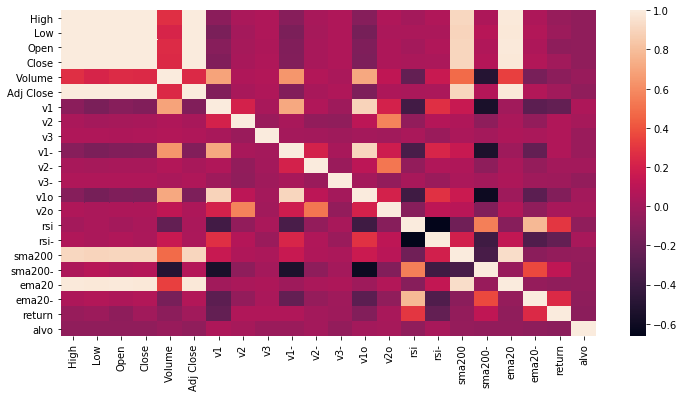

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E00120040>]],
      dtype=object)

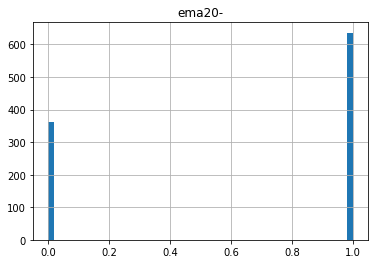

In [9]:
df.hist(column='ema20-', bins=50)

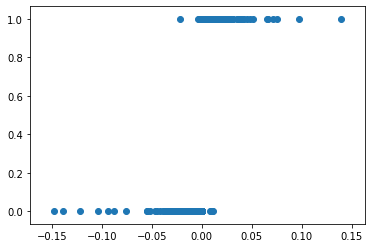

In [10]:
plt.scatter(df['return'], df['alvo'].shift(1))

In [ ]:

# salvar modelo
import pickle
 
# salvar o modelo no arquivo modelo + symbol + Timeframe + .pkl
with open('logistic_regression_forex.pkl', 'wb') as file:
    pickle.dump(modelo, file)